In [1]:
#importam bibliotecile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# **I. Importarea bazei de date**



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive #conectarea cu drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#incarcam baza de date
data = pd.read_csv('/content/gdrive/MyDrive/PSV-Proiect/voice.csv')

In [5]:
#afisam baza de date
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [6]:
#verificam daca exista sau nu valori lipsa
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

## **II. Prelucrarea parametrilor**

In [7]:
label_encoder = LabelEncoder() #am creat un obiect

data['label'] = label_encoder.fit_transform(data['label']) #codificam coloana cu numele 'Label'



In [8]:
dict(enumerate(label_encoder.classes_)) #verificam ce elemente au fost codificate si cu ce simboluri

{0: 'female', 1: 'male'}

In [9]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


Divizarea și scalarea

In [10]:
#Datele se impart in doua parti: 
y = data['label'].copy()   #y- ceea ce incercam sa prezicem, eticheta , y-vector
X = data.drop('label', axis=1).copy()   #x-toate celelalte elemnte, dupa ce am exclus etichetele, x-matrice

In [11]:
scaler = StandardScaler()  #un scalar care va da fiecare coloana in medie x0 si varianta unitara -> toate intervalele vor avea un interva similar

X = scaler.fit_transform(X)

print(X)
print(X.shape)

[[-4.04924806  0.4273553  -4.22490077 ... -1.43142165 -1.41913712
  -1.45477229]
 [-3.84105325  0.6116695  -3.99929342 ... -1.41810716 -1.4058184
  -1.01410294]
 [-3.46306647  1.60384791 -4.09585052 ... -1.42920257 -1.41691733
  -1.06534356]
 ...
 [-1.29877326  2.32272355 -0.05197279 ... -0.5992661  -0.58671739
   0.17588664]
 [-1.2452018   2.012196   -0.01772849 ... -0.41286326 -0.40025537
   1.14916112]
 [-0.51474626  2.14765111 -0.07087873 ... -1.27608595 -1.2637521
   1.47567886]]
(3168, 20)


In [12]:
#ne luam un set de teste de andrenament -> ne impartim xy intr-un set de antrenare
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[ 0.6062224   0.56931149  0.7770935  ...  1.31580119  1.3245183
  -0.60075897]
 [ 1.04345699 -0.87327782  0.68378988 ...  0.62344778  0.63194508
  -0.0529519 ]
 [-1.56456085  0.43680145 -2.08411215 ... -0.47277846 -0.46018959
  -0.67164701]
 ...
 [ 0.71628666  0.35285606  0.99919377 ...  0.67670573  0.68521995
  -0.67244475]
 [ 0.02983232  0.05862641  0.17650263 ... -0.19539328 -0.18715592
  -0.9330489 ]
 [-0.44043779  0.54648806 -0.37779616 ...  0.27727107  0.28565848
  -0.42171608]]
[[ 0.19810421 -1.78106493 -0.03564097 ... -1.36928737 -1.35698311
  -0.54274412]
 [ 0.26651063  0.19157298  0.27277335 ...  1.04285417  1.05148463
  -0.62828301]
 [-1.00964614  1.80191395 -0.31141599 ...  0.14634527  0.15913068
   1.32828292]
 ...
 [-0.36917655 -0.22688813 -0.31152686 ...  0.24398485  0.23238362
  -0.37020151]
 [-1.45733268  1.22870874 -0.89933522 ...  0.29280464  0.30119698
   1.01092032]
 [-1.11323461  2.23178532  0.02046356 ... -1.19397993 -1.18162002
   1.05461454]]
1135    1
2912   

In [13]:
#afisam datele caracteristicilor

print("Afisam X: ");
print(X.shape) 

print("Afisam X_train: ")
print(X_train.shape)

print("Afisam X_test: ")
print(X_test.shape)

print("Afisam y_train: ")
print(y_train.shape)

print("Afisam y_test: ")
print(y_test.shape)


Afisam X: 
(3168, 20)
Afisam X_train: 
(2217, 20)
Afisam X_test: 
(951, 20)
Afisam y_train: 
(2217,)
Afisam y_test: 
(951,)


# **III.Modelare și antrenare**

Retea neuronala 

In [14]:
#layer
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x) #la iesire avem o singua valoare, care va fi o estimare a probabilitatii

print("INPUTS: ")
print(inputs.shape)

print("Dense: ")
print(x.shape)

print("Dense_1: ")
print(x.shape)

print("OUTPUTS: ")
print(outputs.shape)


model1 = tf.keras.Model(inputs, outputs)  #am creat modelul


INPUTS: 
(None, 20)
Dense: 
(None, 64)
Dense_1: 
(None, 64)
OUTPUTS: 
(None, 1)


In [15]:
model1.summary() #folosim summary pentru a vedea cum se schimba forma noastra

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense (Dense)               (None, 64)                1344      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________


In [16]:
model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

#stocam modelul nostru
history = model1.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)


Epoch 1/100
56/56 [==============================] - 2s 7ms/step - loss: 0.4088 - accuracy: 0.8562 - auc: 0.9316 - val_loss: 0.1983 - val_accuracy: 0.9482 - val_auc: 0.9903
Epoch 2/100
56/56 [==============================] - 0s 3ms/step - loss: 0.1474 - accuracy: 0.9583 - auc: 0.9906 - val_loss: 0.0931 - val_accuracy: 0.9707 - val_auc: 0.9957
Epoch 3/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0927 - accuracy: 0.9667 - auc: 0.9951 - val_loss: 0.0695 - val_accuracy: 0.9820 - val_auc: 0.9965
Epoch 4/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0746 - accuracy: 0.9746 - auc: 0.9962 - val_loss: 0.0674 - val_accuracy: 0.9820 - val_auc: 0.9965
Epoch 5/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0680 - accuracy: 0.9769 - auc: 0.9968 - val_loss: 0.0561 - val_accuracy: 0.9910 - val_auc: 0.9972
Epoch 6/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0647 - accuracy: 0.9786 - auc: 0.9970 - val_loss: 0.0588 - v

In [17]:
model1.evaluate(X_test, y_test)

#model.evaluate(X_test, y_test) este o metodă în TensorFlow/Keras care este folosită pentru a evalua performanța unui model de învățare automată pe un set de date de test. Aceasta primește două argumente obligatorii:
#X_test: Setul de date de test, care conține caracteristicile (exemplarele) pe care modelul nu le-a văzut anterior și pe care se dorește să le evalueze.
#y_test: Etichetele (ground truth) corespunzătoare din setul de date de test, care reprezintă valorile adevărate pentru variabila țintă (clasele) pe care modelul încearcă să o prezică.

# Evaluare pe datele de test
scores = model1.evaluate(X_test, y_test, verbose=1)

# Afisare scoruri
print("Loss: ", scores[0])
print("Accuracy: ", scores[1])
print("AUC: ", scores[2])



30/30 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9769 - auc: 0.9973
Loss:  0.06518227607011795
Accuracy:  0.9768664836883545
AUC:  0.997268795967102


30/30 [==============================] - 0s 5ms/step - loss: 0.0652 - accuracy: 0.9769 - auc: 0.9973
Loss:  0.06518227607011795
Accuracy:  0.9768664836883545
AUC:  0.997268795967102


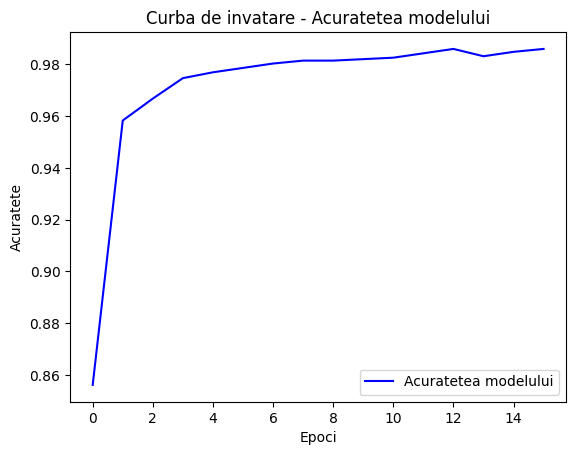

In [18]:
# Evaluare pe datele de test
scores = model1.evaluate(X_test, y_test, verbose=1)

# Afisare scoruri
print("Loss: ", scores[0])
print("Accuracy: ", scores[1])
print("AUC: ", scores[2])

# Trasarea curbei de învățare
accuracy = history.history['accuracy']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Acuratetea modelului')
plt.title('Curba de invatare - Acuratetea modelului')
plt.xlabel('Epoci')
plt.ylabel('Acuratete')
plt.legend()
plt.show()


Retee CNN 2D

In [19]:
#Stratul convolutional bidimensional preia o imagine in esenta sau o matrice de date pixeli
#preia date din imagine (mici sectiuni din imagine)
#practic o linie mare de 20 de elemente o transformam intr-un 'patra' care contine fix aceleasi informatii 
X = tf.keras.preprocessing.sequence.pad_sequences(X, dtype=np.float, maxlen=25, padding='post')
X = X.reshape(-1, 5, 5)
X = np.expand_dims(X, axis=3)

<ipython-input-19-46a69406945a>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = tf.keras.preprocessing.sequence.pad_sequences(X, dtype=np.float, maxlen=25, padding='post')


In [20]:
X.shape

(3168, 5, 5, 1)

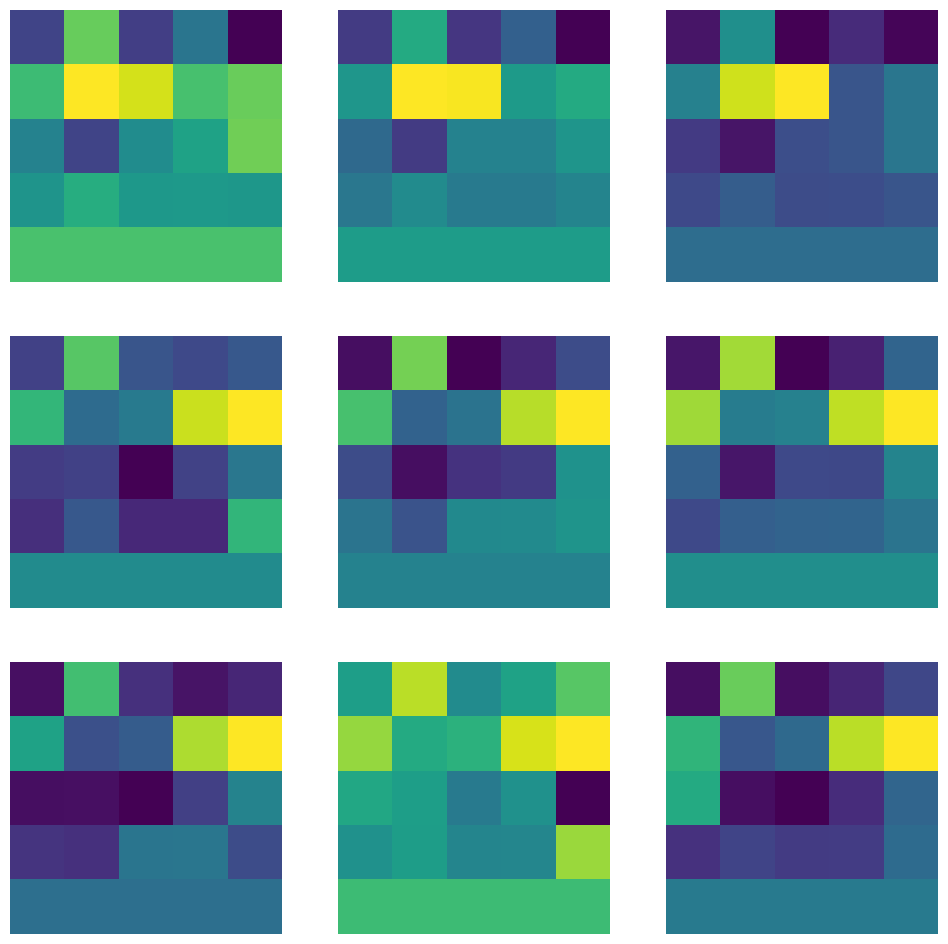

In [21]:
plt.figure(figsize=(12, 12))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.squeeze(X[i]))
    plt.axis('off')
    
plt.show()

In [22]:
# Redimensionarea datelor de intrare pentru a se potrivi cu rețeaua convolutională
X = np.expand_dims(X, axis=3)

# Divizarea setului de date în setul de antrenament și setul de testare
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)


# Definirea dimensiunilor datelor de intrare pentru rețeaua convolutională
input_shape = (X.shape[1], X.shape[2], X.shape[3])

# Definirea modelului rețelei convolutionale
inputs = tf.keras.Input(shape=input_shape)
x = tf.keras.layers.Conv2D(16, 2, activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(32, 1, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model2 = tf.keras.Model(inputs, outputs)


In [23]:
#Construim un model nou
#layer
inputs = tf.keras.Input(shape=(X.shape[1], X.shape[2], X.shape[3]))
print (inputs)
print(inputs.shape)

x = tf.keras.layers.Conv2D(16, 2, activation='relu')(inputs) #folosim o convolutie
print (x)
print(x.shape)

x = tf.keras.layers.MaxPooling2D()(x)
print (x)
print(x.shape)

x = tf.keras.layers.Conv2D(32, 1, activation='relu')(x)
print (x)
print(x.shape)

x = tf.keras.layers.MaxPooling2D()(x)
print (x)
print(x.shape)

x = tf.keras.layers.Flatten()(x) #apelam
print (x)
print(x.shape)

x = tf.keras.layers.Dense(64, activation='relu')(x) #il alimentam
print (x)
print(x.shape)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
print (outputs)
print(outputs.shape)

model2 = tf.keras.Model(inputs, outputs)


KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5, 1), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")
(None, 5, 5, 1)
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 4, 16), dtype=tf.float32, name=None), name='conv2d_2/Relu:0', description="created by layer 'conv2d_2'")
(None, 4, 4, 16)
KerasTensor(type_spec=TensorSpec(shape=(None, 2, 2, 16), dtype=tf.float32, name=None), name='max_pooling2d_2/MaxPool:0', description="created by layer 'max_pooling2d_2'")
(None, 2, 2, 16)
KerasTensor(type_spec=TensorSpec(shape=(None, 2, 2, 32), dtype=tf.float32, name=None), name='conv2d_3/Relu:0', description="created by layer 'conv2d_3'")
(None, 2, 2, 32)
KerasTensor(type_spec=TensorSpec(shape=(None, 1, 1, 32), dtype=tf.float32, name=None), name='max_pooling2d_3/MaxPool:0', description="created by layer 'max_pooling2d_3'")
(None, 1, 1, 32)
KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='flatten_1/Reshape:0', descript

In [24]:
model2.summary()  #reteaua convolutionala

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 5, 5, 1)]         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          80        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 32)          544       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 32)                0   

In [25]:
#antrenam - folosim acelasi cod ca si cel de sus
model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model2.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
56/56 [==============================] - 2s 9ms/step - loss: 0.6718 - accuracy: 0.6266 - auc: 0.7063 - val_loss: 0.6380 - val_accuracy: 0.6329 - val_auc: 0.8331
Epoch 2/100
56/56 [==============================] - 0s 3ms/step - loss: 0.5495 - accuracy: 0.7603 - auc: 0.8620 - val_loss: 0.4845 - val_accuracy: 0.7748 - val_auc: 0.8736
Epoch 3/100
56/56 [==============================] - 0s 3ms/step - loss: 0.3763 - accuracy: 0.8686 - auc: 0.9417 - val_loss: 0.3265 - val_accuracy: 0.8716 - val_auc: 0.9577
Epoch 4/100
56/56 [==============================] - 0s 3ms/step - loss: 0.2720 - accuracy: 0.9041 - auc: 0.9639 - val_loss: 0.2590 - val_accuracy: 0.8964 - val_auc: 0.9692
Epoch 5/100
56/56 [==============================] - 0s 4ms/step - loss: 0.2237 - accuracy: 0.9210 - auc: 0.9724 - val_loss: 0.2243 - val_accuracy: 0.9122 - val_auc: 0.9760
Epoch 6/100
56/56 [==============================] - 0s 3ms/step - loss: 0.2082 - accuracy: 0.9199 - auc: 0.9751 - val_loss: 0.2044 - v

In [26]:
print("Afisam X: ");
print(X.shape) #afisam datele caracteristicilor

print("Afisam X_train: ")
print(X_train.shape)

print("Afisam X_test: ")
print(X_test.shape)

print("Afisam y_train: ")
print(y_train.shape)

print("Afisam y_test: ")
print(y_test.shape)

Afisam X: 
(3168, 5, 5, 1, 1)
Afisam X_train: 
(2217, 5, 5, 1, 1)
Afisam X_test: 
(951, 5, 5, 1, 1)
Afisam y_train: 
(2217,)
Afisam y_test: 
(951,)


30/30 [==============================] - 0s 2ms/step - loss: 0.1123 - accuracy: 0.9558 - auc: 0.9927
Loss:  0.11233574897050858
Accuracy:  0.9558359384536743
AUC:  0.9927043318748474


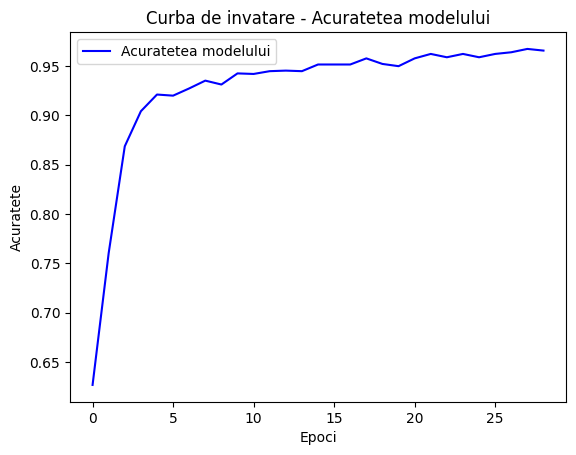

In [27]:
# Evaluare pe datele de test
scores = model2.evaluate(X_test, y_test, verbose=1)

# Afisare scoruri
print("Loss: ", scores[0])
print("Accuracy: ", scores[1])
print("AUC: ", scores[2])

# Trasarea curbei de învățare
accuracy = history.history['accuracy']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Acuratetea modelului')
plt.title('Curba de invatare - Acuratetea modelului')
plt.xlabel('Epoci')
plt.ylabel('Acuratete')
plt.legend()
plt.show()


Spectrograma

<ipython-input-28-560ce87cf01c>:5: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=25).
  plt.specgram(X[i].reshape(-1), NFFT=256, Fs=2, noverlap=128)


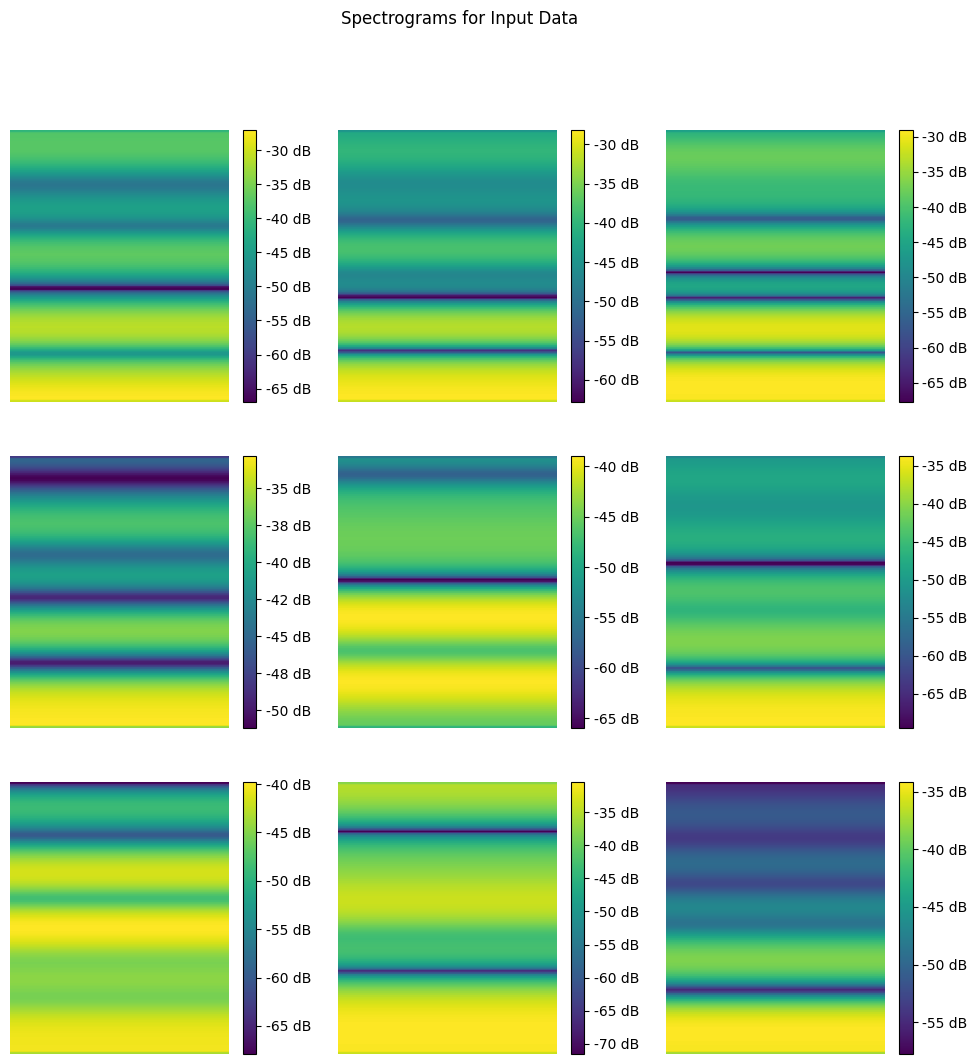

In [28]:
# Afișarea spectrogramelor pentru primele 9 exemple
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.specgram(X[i].reshape(-1), NFFT=256, Fs=2, noverlap=128)
    plt.colorbar(format='%+2.0f dB')
    plt.axis('off')
plt.suptitle('Spectrograms for Input Data')
plt.show()


# **IV.Testarea**

a) Sample din baza de date de validare

In [29]:
# Extragem a treia intrare din setul de date de validare
sample = X_test[2]

# Înlocuiesc "nume_coloană_y" cu numele coloanei care conține etichetele y din setul de date ( "label")
sample_label = y_test.iloc[2]

# Am prezis eticheta pentru această intrare
predicted_label = np.round(model2.predict(np.expand_dims(sample, axis=0)))[0][0]

# Am afisat datele de intrare, eticheta reală și eticheta prezisă
print("Datele de intrare:")
print(sample)

print("Eticheta reală:")
print(sample_label)

print("Eticheta prezisă:")
print(predicted_label)


1/1 [==============================] - 0s 104ms/step
Datele de intrare:
[[[[-1.00964614]]

  [[ 1.80191395]]

  [[-0.31141599]]

  [[-1.45441311]]

  [[ 0.05572206]]]


 [[[ 1.68565913]]

  [[-0.12647039]]

  [[-0.10555066]]

  [[ 1.6490123 ]]

  [[ 2.1043802 ]]]


 [[[-1.4911185 ]]

  [[-1.00964614]]

  [[-1.01596956]]

  [[-1.01690757]]

  [[ 0.26018471]]]


 [[[ 0.78408995]]

  [[-0.70840431]]

  [[ 0.14634527]]

  [[ 0.15913068]]

  [[ 1.32828292]]]


 [[[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]]]
Eticheta reală:
1
Eticheta prezisă:
1.0


b) Inregistrare proprie

In [30]:
#Citire si afisare fisiere audio
import wave
import numpy as np


input_wav_file = './speech_files/InregistrarePSV.wav'
wav_struct = wave.open(input_wav_file, 'r')
# returnează frecvența de eșantionare
sampling_frequency = wav_struct.getframerate()
print ("The sampling frequency of the file is: %d [Hz]" %sampling_frequency)

# returnează numărul de biți pe care e stocat un eșantion
bit_depth = wav_struct.getsampwidth()
print ("The sample width of the file is: %d [bytes/sample] or %d [bits/sample]" %(bit_depth, bit_depth*8))

# returnează numărul de canale
no_channels = wav_struct.getnchannels()
print ("The number of channels in the file is %d or %s" %(no_channels, 'mono' if no_channels==1 else 'stereo'))

# retunează numărul de eșantioane
nframes = wav_struct.getnframes()
print ("The number of samples in the file is: %d" %nframes)

# returnează tipul compresiei. Pentru fișiere wav, aceasta este 'None'
compression_type = wav_struct.getcomptype()
print ("The compression type of the file is: %s " %compression_type)

# Sau putem obține toată informația de mai sus într-o singură linie
(nchannels, sampwidth, framerate, nframes, comptype, compname) = wav_struct.getparams()

# citim biții din fișierul de intrare
wav_bytes = wav_struct.readframes(-1)
# afișam tipul datelor citite
print ("wav_bytes is of type %s" %type(wav_bytes))

# convertim datele în format int16
wav_data = np.frombuffer(wav_bytes, dtype='int16')
# afișăm tipul datelor convertite
print ("wav_data is of type %s" %type(wav_data))
wav_data2 = wav_data[:]
print (wav_data)

wav_struct.close()

The sampling frequency of the file is: 44100 [Hz]
The sample width of the file is: 2 [bytes/sample] or 16 [bits/sample]
The number of channels in the file is 1 or mono
The number of samples in the file is: 136192
The compression type of the file is: NONE 
wav_bytes is of type <class 'bytes'>
wav_data is of type <class 'numpy.ndarray'>
[  0   0   0 ...  -5 -11  -4]


In [31]:
import IPython
IPython.display.Audio(wav_data, rate=sampling_frequency)

In [32]:
!pip install librosa 
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import librosa
import numpy as np
from scipy.stats import skew, kurtosis, entropy, mode
from librosa.util import peak_pick
from sklearn.preprocessing import StandardScaler
from scipy.signal import find_peaks

# Citirea fișierului audio WAV
audio_path =  './speech_files/InregistrarePSV.wav'
audio, sr = librosa.load(audio_path)

# Extrage caracteristici din semnalul audio
spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=sr)

meanfreq1 = np.mean(spectral_centroids)
# Converteste in kHz
meanfreq = meanfreq1 / 1000

sd1= librosa.feature.spectral_bandwidth(y=audio, sr=sr)
sd=np.std(sd1)

median = np.median(spectral_centroids)/1000

q25 = np.percentile(spectral_centroids, 25)/1000
q75 = np.percentile(spectral_centroids, 75)/1000
IQR = q75 - q25

skewness = skew(audio)  # Calculăm skewness folosind funcția skew din scipy.stats

kurt = kurtosis(audio)  # Calculăm kurtosis folosind funcția kurtosis din scipy.stats

sp_ent = np.mean(entropy(librosa.feature.melspectrogram(y=audio, sr=sr)))  # Calculăm entropia spectrală folosind funcția entropy din scipy.stats

sfm = np.mean(librosa.feature.spectral_flatness(y=audio))

mode_freq = np.mean(librosa.feature.spectral_rolloff(y=audio))

centroid = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sr))/1000

peakf = np.mean(find_peaks(audio)[0])

meanfun = np.mean(librosa.feature.mfcc(y=audio))

minfun = librosa.feature.mfcc(y=audio).min()

maxfun = librosa.feature.mfcc(y=audio).max()


# Calcularea frecvenței fundamentale (f0) utilizând autocorelația
def autocorrelation_f0(signal, sr):
    autocorr = np.correlate(signal, signal, mode='full')
    autocorr = autocorr[len(autocorr) // 2:]
    diff = np.diff(autocorr)
    peaks, _ = find_peaks(diff)
    peak = peaks[0]
    f0 = sr / peak
    return f0

# Calcularea mediei frecvenței fundamentale (meandom)
f0 = autocorrelation_f0(audio, sr)
meandom = np.mean(f0)

# Calcularea valorilor minime și maxime ale frecvenței fundamentale (mindom și maxdom)
mindom = np.min(f0)
maxdom = np.max(f0)

# Calcularea intervalului (range) frecvenței fundamentale (dfrange)
dfrange = maxdom - mindom

# Calcularea modindx
if isinstance(f0, np.ndarray) and len(f0) > 1:
    diff_f0 = np.diff(f0)
    modindx = np.sum(np.abs(diff_f0)) / dfrange
else:
    modindx = 0

    
# Afișarea rezultatelor
label = "female" # Înlocuiește cu eticheta corespunzătoare

# Afisarea caracteristicilor extrase
print("Mean Frequency: ",meanfreq)
print("Standard Deviation:", sd)
print("Median:", median)
print("Q25:", q25)
print("Q75:", q75)
print("IQR:", IQR)
print("Skewness:", skewness)
print("Kurtosis:", kurt)
print("Spectral Entropy:", sp_ent)
print("Spectral Flatness:", sfm)
print("Mode Frequency:",mode_freq)
print("Frequency Centroid:", centroid)
print("Peak Frequency:", peakf)
print("Mean Fundamental Frequency:", meanfun)
print("Minimum Fundamental Frequency:", minfun)
print("Maximum Fundamental Frequency:", maxfun)
print("Average of dominant frequency (meandom):", meandom)
print("Minimum of dominant frequency (mindom):", mindom)
print("Maximum of dominant frequency (maxdom):", maxdom)
print("Range of dominant frequency (dfrange):", dfrange)
print("Modulation index (modindx):", modindx)
print("Label:", label)

Mean Frequency:  1.7303781841423302
Standard Deviation: 534.6670284418938
Median: 1.3546799841480852
Q25: 0.8433129203654428
Q75: 2.3355426562913215
IQR: 1.4922297359258787
Skewness: 0.6558203473356289
Kurtosis: 5.8360400399385775
Spectral Entropy: 2.3319578
Spectral Flatness: 0.016071647
Mode Frequency: 3211.661176539179
Frequency Centroid: 1.7303781841423302
Peak Frequency: 32805.97529872477
Mean Fundamental Frequency: -16.522346
Minimum Fundamental Frequency: -582.06323
Maximum Fundamental Frequency: 194.76645
Average of dominant frequency (meandom): 1575.0
Minimum of dominant frequency (mindom): 1575.0
Maximum of dominant frequency (maxdom): 1575.0
Range of dominant frequency (dfrange): 0.0
Modulation index (modindx): 0
Label: female


In [34]:
# Pregătirea datelor de intrare
input_data = np.array([meanfreq, sd, median, q25, q75, IQR, skewness, kurt, sp_ent, sfm, mode_freq, centroid,meanfun,peakf,minfun,maxfun,meandom,mindom,maxdom,dfrange])
input_data = np.expand_dims(input_data, axis=0)  # Adăugarea unei dimensiuni suplimentare pentru formatul de lot

# Realizarea predicției
prediction = model1.predict(input_data)
predict_int = []
for i in prediction[0]:
  predict_int.append(int(i))
# Decodificarea predicției
predicted_label = label_encoder.inverse_transform(predict_int)[0]

# Afisarea predicției
print("Eticheta prezisă:", predicted_label)


1/1 [==============================] - 0s 244ms/step
Eticheta prezisă: female
